<a href="https://colab.research.google.com/github/JorgeAccardi/cienciadedatos/blob/main/pacientes_diagnosticado_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/diabetes.csv')

In [3]:
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [4]:
x = datos.drop('diabetes', axis=1)
y = datos['diabetes']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x, x_prueba, y, y_prueba = train_test_split(x, y, stratify=y, test_size=0.05, random_state=5)
x_entranamiento, x_validacion, y_entreamiento, y_validacion = train_test_split(x, y, stratify=y, random_state=5)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
arbol = DecisionTreeClassifier(max_depth=3)
random_forest = RandomForestClassifier(max_depth=2)

In [11]:
arbol.fit(x_entranamiento, y_entreamiento)
print(f'Precisión de entrenamiento: {arbol.score(x_entranamiento, y_entreamiento)}')
print(f'Precisión de validación: {arbol.score(x_validacion, y_validacion)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de validación: 0.776595744680851


In [14]:
random_forest.fit(x_entranamiento, y_entreamiento)
print(f'Precisión de entrenamiento: {random_forest.score(x_entranamiento, y_entreamiento)}')
print(f'Precisión de validación: {random_forest.score(x_validacion, y_validacion)}')

Precisión de entrenamiento: 0.7392857142857143
Precisión de validación: 0.6914893617021277


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

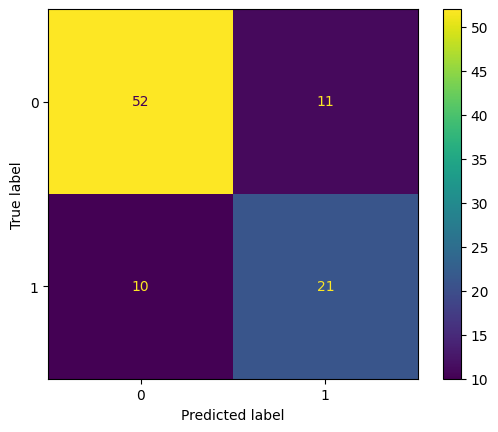

In [18]:
prediccion_arbol = arbol.predict(x_validacion)
ConfusionMatrixDisplay.from_predictions(y_validacion, prediccion_arbol)

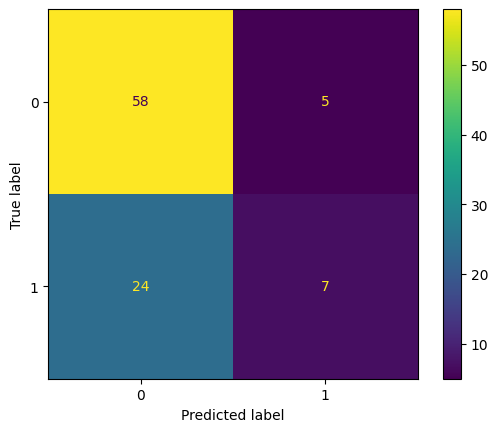

In [20]:
prediccion_rf = random_forest.predict(x_validacion)
ConfusionMatrixDisplay.from_predictions(y_validacion, prediccion_rf)